# Zonal Mean

The zonal mean is the weighted average of a variable (e.g., temperature, humidity, wind speed) across all longitudes at a specific latitude. The weight of a face is proportional to the extent of its intersection with the arc at the constant latitude. This is calculated as the ratio of the intersection length to the total arc length. In this guide, we will demonstrate how to calculate zonal means of data using `uxarray`. Zonal mean is a common operation in climate and geospatial data analysis, where we average data values along latitudinal bands.

In [5]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import uxarray as ux

In [84]:
def plot_zonal_mean(
    uxda,
    zonal_mean,
    grid_title="",
    zonal_title="",
    marker="--",
    zonal_xlim=(-10, 10),
    cmap="Blues",
):
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)

    spec = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=[5, 1], wspace=0.1)

    # Global Plot
    ax0 = fig.add_subplot(spec[0])
    ax0.set_xlim((-180, 180))
    ax0.set_ylim((-90, 90))
    pc = uxda.to_polycollection(periodic_elements="exclude")
    pc.set_cmap(cmap)
    ax0.add_collection(pc)
    cbar = fig.colorbar(pc, ax=ax0, orientation="vertical", location="left", shrink=0.8)
    cbar.set_label("Colorbar Label")
    ax0.set_title(grid_title)

    # Zonal Plot
    ax1 = fig.add_subplot(spec[1])
    ax1.set_ylim((-90, 90))
    ax1.set_xlim(zonal_xlim)
    ax1.grid()
    ax1.set_title(zonal_title)

    ax1.plot(zonal_mean.values, zonal_mean.latitude_deg.values, marker, lw=2)

In [87]:
base_path = "../../test/meshfiles/ugrid/outCSne30/"
grid_path = base_path + "outCSne30.ug"
data_path = base_path + "relhum.nc"

uxds = ux.open_dataset(grid_path, data_path)

uxds

<xarray.UxDataset>
Dimensions:  (n_face: 5400)
Dimensions without coordinates: n_face
Data variables:
    relhum   (n_face) float32 81.94 58.98 43.18 46.15 ... 110.0 35.3 114.8 60.65

In [99]:
relhum_zonal_mean = uxds["relhum"].zonal_mean()

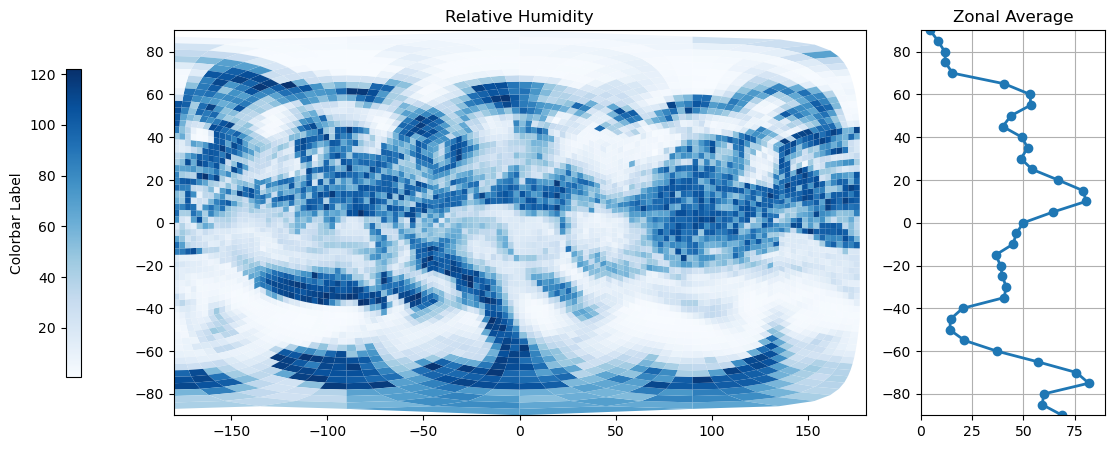

In [100]:
plot_zonal_mean(
    uxds["relhum"],
    relhum_zonal_mean,
    grid_title="Relative Humidity",
    zonal_title="Zonal Average",
    marker="o-",
    zonal_xlim=(0, 90),
)

We can specify the desired latitude range and the number of latitudes to sample by passing in a tuple to the `zonal_mean` function in the form of ``(MIN_LATITUDE, MAX_LATITUDE, STEP)``


In [102]:
relhum_zonal_mean = uxds["relhum"].zonal_mean((-45, 45, 10))

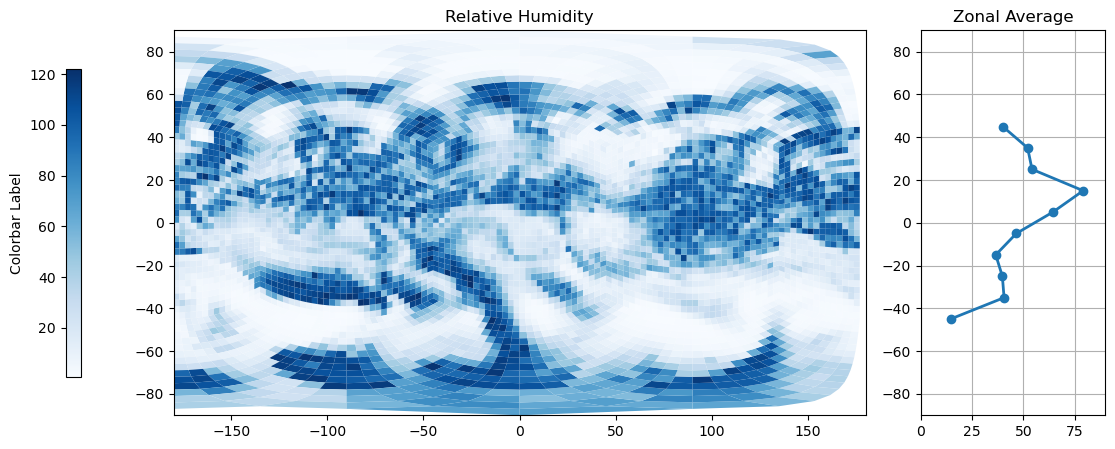

In [103]:
plot_zonal_mean(
    uxds["relhum"],
    relhum_zonal_mean,
    grid_title="Relative Humidity",
    zonal_title="Zonal Average",
    marker="o-",
    zonal_xlim=(0, 90),
)